<a href="https://colab.research.google.com/github/sheilaftria/Court-Decision-Document-in-Narcotic-Cases-Summarization-Using-BERT/blob/main/PAPER_BERT_%26_ROUGE_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install bert-extractive-summarizer

     |████████████████████████████████| 2.6 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 35.9 MB/s 
     |████████████████████████████████| 895 kB 40.4 MB/s 
     |████████████████████████████████| 636 kB 49.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install git+https://github.com/vasudevgupta7/transformers.git@add_big_bird # TODO: replace with new pip version eventually

  Cloning https://github.com/vasudevgupta7/transformers.git (to revision add_big_bird) to /tmp/pip-req-build-sgjsybu6
  Running command git clone -q https://github.com/vasudevgupta7/transformers.git /tmp/pip-req-build-sgjsybu6
  Running command git checkout -b add_big_bird --track origin/add_big_bird
  Switched to a new branch 'add_big_bird'
  Branch 'add_big_bird' set up to track remote branch 'add_big_bird' from 'origin'.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for transformers: filename=transformers-4.5.0.dev0-py3-none-any.whl size=2018605 sha256=9ff02affcd63a5827597a677113cadd3d6bd9439a7a77e1d022cc455238f5307
  Stored in directory: /tmp/pip-ephem-wheel-cache-qsdwoljd/wheels/67/dc/c9/bbffcb3d80e8aa344e7c4ca15b3d2d253303b964a070c2d663
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.9.0
    Uninstalling transformers-

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/data_putusan
!ls

/content/gdrive/.shortcut-targets-by-id/1g7fom6mJ5njOWw3zGW1iIg4wKKys0lSQ/data_putusan
canceled	  dok_putusan_txt_raw  hasil_ringkasan_30    vocab1.txt
dok_putusan_pdf   hasil_evaluasi       hasil_ringkasan_40    vocab.txt
dok_putusan_txt   hasil_ringkasan2     referensi_ringkasan
dok_putusan_txt2  hasil_ringkasan_20   referensi_ringkasan2


In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoConfig

config = AutoConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.output_hidden_states=True
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1", config=config)

In [ ]:
pip install "sentencepiece==0.1.85"

     |████████████████████████████████| 1.0 MB 5.1 MB/s 


In [ ]:
from summarizer import Summarizer
bert = Summarizer(custom_model=model, custom_tokenizer=tokenizer)
# bert = Summarizer()

untuk dokumen yang menggunakan identitas

In [ ]:
files = [f for f in listdir("dok_putusan_txt") if isfile(join("dok_putusan_txt", f)) and f != '.DS_Store']
files.sort()
print(files)

['doc01.txt', 'doc02.txt', 'doc03.txt', 'doc04.txt', 'doc05.txt', 'doc06.txt', 'doc07.txt', 'doc08.txt', 'doc09.txt', 'doc10.txt', 'doc11.txt', 'doc12.txt', 'doc13.txt', 'doc14.txt', 'doc15.txt', 'doc16.txt', 'doc17.txt', 'doc18.txt', 'doc19.txt', 'doc20.txt', 'doc21.txt', 'doc22.txt', 'doc23.txt', 'doc24.txt', 'doc25.txt', 'doc26.txt', 'doc27.txt', 'doc28.txt', 'doc29.txt', 'doc30.txt', 'doc31.txt', 'doc32.txt', 'doc33.txt', 'doc34.txt', 'doc35.txt', 'doc36.txt', 'doc37.txt', 'doc38.txt', 'doc39.txt', 'doc40.txt', 'doc41.txt', 'doc42.txt', 'doc43.txt', 'doc44.txt', 'doc45.txt', 'doc46.txt', 'doc47.txt', 'doc48.txt', 'doc49.txt', 'doc50.txt']


untuk dokumen yang tidak menggunakan identitas

In [ ]:
files = [f for f in listdir("dok_putusan_txt2") if isfile(join("dok_putusan_txt2", f)) and f != '.DS_Store']
files.sort()
print(files)

['doc01.txt', 'doc02.txt', 'doc03.txt', 'doc04.txt', 'doc05.txt', 'doc06.txt', 'doc07.txt', 'doc08.txt', 'doc09.txt', 'doc10.txt', 'doc11.txt', 'doc12.txt', 'doc13.txt', 'doc14.txt', 'doc15.txt', 'doc16.txt', 'doc17.txt', 'doc18.txt', 'doc19.txt', 'doc20.txt', 'doc21.txt', 'doc22.txt', 'doc23.txt', 'doc24.txt', 'doc25.txt', 'doc26.txt', 'doc27.txt', 'doc28.txt', 'doc29.txt', 'doc30.txt', 'doc31.txt', 'doc32.txt', 'doc33.txt', 'doc34.txt', 'doc35.txt', 'doc36.txt', 'doc37.txt', 'doc38.txt', 'doc39.txt', 'doc40.txt', 'doc41.txt', 'doc42.txt', 'doc43.txt', 'doc44.txt', 'doc45.txt', 'doc46.txt', 'doc47.txt', 'doc48.txt', 'doc49.txt', 'doc50.txt']


PERINGKASAN DOKUMEN PUTUSAN DENGAN IDENTITAS TERDAKWA

In [ ]:
for filename in files: 
    file = open('dok_putusan_txt/' + filename, 'r')
    txt = file.read()
    file.close()
    print("{} sedang diproses ... ".format(filename), end="")
    summary1 = bert(txt,ratio = 0.2)
    file = open("hasil_ringkasan_20/" + filename, 'w')
    file.write(summary1)
    file.close()
    print("selesai".format(filename))

print("\n\nSemua proses telah selesai, silahkan cek folder hasil_ringkasan")

doc01.txt sedang diproses ... selesai
doc02.txt sedang diproses ... selesai
doc03.txt sedang diproses ... selesai
doc04.txt sedang diproses ... selesai
doc05.txt sedang diproses ... selesai
doc06.txt sedang diproses ... selesai
doc07.txt sedang diproses ... selesai
doc08.txt sedang diproses ... selesai
doc09.txt sedang diproses ... selesai
doc10.txt sedang diproses ... selesai
doc11.txt sedang diproses ... selesai
doc12.txt sedang diproses ... selesai
doc13.txt sedang diproses ... selesai
doc14.txt sedang diproses ... selesai
doc15.txt sedang diproses ... selesai
doc16.txt sedang diproses ... selesai
doc17.txt sedang diproses ... selesai
doc18.txt sedang diproses ... selesai
doc19.txt sedang diproses ... selesai
doc20.txt sedang diproses ... selesai
doc21.txt sedang diproses ... selesai
doc22.txt sedang diproses ... selesai
doc23.txt sedang diproses ... selesai
doc24.txt sedang diproses ... selesai
doc25.txt sedang diproses ... selesai
doc26.txt sedang diproses ... selesai
doc27.txt se

In [ ]:
for filename in files: 
    file = open('dok_putusan_txt/' + filename, 'r')
    txt = file.read()
    file.close()
    print("{} sedang diproses ... ".format(filename), end="")
    summary2 = bert(txt,ratio = 0.3)
    file = open("hasil_ringkasan_30/" + filename, 'w')
    file.write(summary2)
    file.close()
    print("selesai".format(filename))

print("\n\nSemua proses telah selesai, silahkan cek folder hasil_ringkasan_30")

doc01.txt sedang diproses ... selesai
doc02.txt sedang diproses ... selesai
doc03.txt sedang diproses ... selesai
doc04.txt sedang diproses ... selesai
doc05.txt sedang diproses ... selesai
doc06.txt sedang diproses ... selesai
doc07.txt sedang diproses ... selesai
doc08.txt sedang diproses ... selesai
doc09.txt sedang diproses ... selesai
doc10.txt sedang diproses ... selesai
doc11.txt sedang diproses ... selesai
doc12.txt sedang diproses ... selesai
doc13.txt sedang diproses ... selesai
doc14.txt sedang diproses ... selesai
doc15.txt sedang diproses ... selesai
doc16.txt sedang diproses ... selesai
doc17.txt sedang diproses ... selesai
doc18.txt sedang diproses ... selesai
doc19.txt sedang diproses ... selesai
doc20.txt sedang diproses ... selesai
doc21.txt sedang diproses ... selesai
doc22.txt sedang diproses ... selesai
doc23.txt sedang diproses ... selesai
doc24.txt sedang diproses ... selesai
doc25.txt sedang diproses ... selesai
doc26.txt sedang diproses ... selesai
doc27.txt se

In [ ]:
for filename in files: 
    file = open('dok_putusan_txt/' + filename, 'r')
    txt = file.read()
    file.close()
    print("{} sedang diproses ... ".format(filename), end="")
    summary3 = bert(txt,ratio = 0.4)
    file = open("hasil_ringkasan_40/" + filename, 'w')
    file.write(summary2)
    file.close()
    print("selesai".format(filename))

print("\n\nSemua proses telah selesai, silahkan cek folder hasil_ringkasan_40")

doc01.txt sedang diproses ... selesai
doc02.txt sedang diproses ... selesai
doc03.txt sedang diproses ... selesai
doc04.txt sedang diproses ... selesai
doc05.txt sedang diproses ... selesai
doc06.txt sedang diproses ... selesai
doc07.txt sedang diproses ... selesai
doc08.txt sedang diproses ... selesai
doc09.txt sedang diproses ... selesai
doc10.txt sedang diproses ... selesai
doc11.txt sedang diproses ... selesai
doc12.txt sedang diproses ... selesai
doc13.txt sedang diproses ... selesai
doc14.txt sedang diproses ... selesai
doc15.txt sedang diproses ... selesai
doc16.txt sedang diproses ... selesai
doc17.txt sedang diproses ... selesai
doc18.txt sedang diproses ... selesai
doc19.txt sedang diproses ... selesai
doc20.txt sedang diproses ... selesai
doc21.txt sedang diproses ... selesai
doc22.txt sedang diproses ... selesai
doc23.txt sedang diproses ... selesai
doc24.txt sedang diproses ... selesai
doc25.txt sedang diproses ... selesai
doc26.txt sedang diproses ... selesai
doc27.txt se

PERINGKASAN DOKUMEN PUTUSAN TANPA IDENTITAS TERDAKWA

In [ ]:
for filename in files: 
    file = open('dok_putusan_txt2/' + filename, 'r')
    txt = file.read()
    file.close()
    print("{} sedang diproses ... ".format(filename), end="")
    summary2_1 = bert(txt,ratio = 0.2)
    file = open("hasil_ringkasan2_20/" + filename, 'w')
    file.write(summary2_1)
    file.close()
    print("selesai".format(filename))

print("\n\nSemua proses telah selesai, silahkan cek folder hasil_ringkasan2_20")

doc01.txt sedang diproses ... selesai
doc02.txt sedang diproses ... selesai
doc03.txt sedang diproses ... selesai
doc04.txt sedang diproses ... selesai
doc05.txt sedang diproses ... selesai
doc06.txt sedang diproses ... selesai
doc07.txt sedang diproses ... selesai
doc08.txt sedang diproses ... selesai
doc09.txt sedang diproses ... selesai
doc10.txt sedang diproses ... selesai
doc11.txt sedang diproses ... selesai
doc12.txt sedang diproses ... selesai
doc13.txt sedang diproses ... selesai
doc14.txt sedang diproses ... selesai
doc15.txt sedang diproses ... selesai
doc16.txt sedang diproses ... selesai
doc17.txt sedang diproses ... selesai
doc18.txt sedang diproses ... selesai
doc19.txt sedang diproses ... selesai
doc20.txt sedang diproses ... selesai
doc21.txt sedang diproses ... selesai
doc22.txt sedang diproses ... selesai
doc23.txt sedang diproses ... selesai
doc24.txt sedang diproses ... selesai
doc25.txt sedang diproses ... selesai
doc26.txt sedang diproses ... selesai
doc27.txt se

In [ ]:
for filename in files: 
    file = open('dok_putusan_txt2/' + filename, 'r')
    txt = file.read()
    file.close()
    print("{} sedang diproses ... ".format(filename), end="")
    summary2_2 = bert(txt,ratio = 0.3)
    file = open("hasil_ringkasan2_30/" + filename, 'w')
    file.write(summary2_2)
    file.close()
    print("selesai".format(filename))

print("\n\nSemua proses telah selesai, silahkan cek folder hasil_ringkasan2_30")

doc01.txt sedang diproses ... selesai
doc02.txt sedang diproses ... selesai
doc03.txt sedang diproses ... selesai
doc04.txt sedang diproses ... selesai
doc05.txt sedang diproses ... selesai
doc06.txt sedang diproses ... selesai
doc07.txt sedang diproses ... selesai
doc08.txt sedang diproses ... selesai
doc09.txt sedang diproses ... selesai
doc10.txt sedang diproses ... selesai
doc11.txt sedang diproses ... selesai
doc12.txt sedang diproses ... selesai
doc13.txt sedang diproses ... selesai
doc14.txt sedang diproses ... selesai
doc15.txt sedang diproses ... selesai
doc16.txt sedang diproses ... selesai
doc17.txt sedang diproses ... selesai
doc18.txt sedang diproses ... selesai
doc19.txt sedang diproses ... selesai
doc20.txt sedang diproses ... selesai
doc21.txt sedang diproses ... selesai
doc22.txt sedang diproses ... selesai
doc23.txt sedang diproses ... selesai
doc24.txt sedang diproses ... selesai
doc25.txt sedang diproses ... selesai
doc26.txt sedang diproses ... selesai
doc27.txt se

In [ ]:
for filename in files: 
    file = open('dok_putusan_txt2/' + filename, 'r')
    txt = file.read()
    file.close()
    print("{} sedang diproses ... ".format(filename), end="")
    summary2_3 = bert(txt,ratio = 0.4)
    file = open("hasil_ringkasan2_40/" + filename, 'w')
    file.write(summary2_3)
    file.close()
    print("selesai".format(filename))

print("\n\nSemua proses telah selesai, silahkan cek folder hasil_ringkasan2_40")

doc01.txt sedang diproses ... selesai
doc02.txt sedang diproses ... selesai
doc03.txt sedang diproses ... selesai
doc04.txt sedang diproses ... selesai
doc05.txt sedang diproses ... selesai
doc06.txt sedang diproses ... selesai
doc07.txt sedang diproses ... selesai
doc08.txt sedang diproses ... selesai
doc09.txt sedang diproses ... selesai
doc10.txt sedang diproses ... selesai
doc11.txt sedang diproses ... selesai
doc12.txt sedang diproses ... selesai
doc13.txt sedang diproses ... selesai
doc14.txt sedang diproses ... selesai
doc15.txt sedang diproses ... selesai
doc16.txt sedang diproses ... selesai
doc17.txt sedang diproses ... selesai
doc18.txt sedang diproses ... selesai
doc19.txt sedang diproses ... selesai
doc20.txt sedang diproses ... selesai
doc21.txt sedang diproses ... selesai
doc22.txt sedang diproses ... selesai
doc23.txt sedang diproses ... selesai
doc24.txt sedang diproses ... selesai
doc25.txt sedang diproses ... selesai
doc26.txt sedang diproses ... selesai
doc27.txt se

ROUGE EVALUATION

In [ ]:
from os import listdir
from os.path import isfile, join
from datetime import date
from time import time
import string
import numpy as np
import pandas as pd

exclude = set(string.punctuation)
list_n = [1, 2, 3, 4] ## ini bisa diubah tergantung mau menggunakan evaluasi Rouge-N nya berapa

In [ ]:
vocab = open("vocab1.txt", 'r').read() 
# sumber : https://github.com/emaknyus/Kosakata/edit/master/txt/daftar-kata-bahasa-indonesia.txt
# sumber : https://github.com/seuriously/genderprediction/edit/master/namatraining.txt
# sumber : https://github.com/edwardsamuel/Wilayah-Administratif-Indonesia

vocab = vocab.split("\n")
len(vocab)

127023

In [ ]:
def casefold(txt):
    txt = ''.join(ch for ch in txt if ch not in exclude)
    return txt.lower()

In [ ]:
def ngram(txt, num):
    arr = txt.split(" ")
    while "" in arr:
        arr.remove("")
    gram = list()
    for i in range(len(arr)):
        token = list()
        for n in range(num):
            try:
                token.append(arr[n+i])
            except:
                pass
        gram.append(', '.join(token))
    return gram

In [ ]:
def rougeScore(ref, hyp):
    match = 0
    for gram in hyp:
        if gram in ref:
            match += 1
    p = match/len(ref)
    return p

## referensi perhitungan rouge score : https://www.mathworks.com/help/textanalytics/ref/rougeevaluationscore.html

In [ ]:
def evaluation(hyp_folder, ref_folder, n):
    hypotheses = [f for f in listdir(hyp_folder) if isfile(join(hyp_folder, f)) and f.endswith(".txt")]
    hypotheses.sort()
    rouge_scores = list()
    spell_errors = list()
    print("Sedang diproses ... ", end="")
    for file in hypotheses:
        try:
            referensi = open(ref_folder + "/" + file, 'r').read()
            hipotesis = open(hyp_folder + "/" + file, 'r').read()
            texts = [
                {
                    "original" : referensi
                },
                {
                    "original" : hipotesis
                }
            ]
            for text in texts:
                text["casefold"] = casefold(text["original"])
                text["ngram"] = ngram(text["casefold"], n) ## mendapatkan ngram dari text referensi dan hasil algo

            ref = texts[0]["ngram"]
            hyp = texts[1]["ngram"]

            rouge_score = rougeScore(ref, hyp)
            rouge_scores.append(round(rouge_score, 2))
        except Exception as e:
            print("Error : " + str(e))

    print("selesai")
    return hypotheses, rouge_scores

HASIL PENGUJIAN DI UJI (DIJALANKAN) SECARA BERGANTIAN

In [ ]:
## RASIO 20%
#start = time()

#rouge_scores = list()
#for n in list_n:
 #   hypotheses, r_s_A_20 = evaluation("hasil_ringkasan_20", "referensi_ringkasan", n)
  #  hypotheses, r_s_B_20 = evaluation("hasil_ringkasan2_20", "referensi_ringkasan2", n)
   # rouge_scores.append((r_s_A_20, r_s_B_20))

#end = time()

#print("Waktu eksekusi : {:.2f} detik".format(end - start))

Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Waktu eksekusi : 9.66 detik


In [ ]:
## RASIO 30%
#start = time()

#rouge_scores = list()
#for n in list_n:
#    hypotheses, r_s_A_30 = evaluation("hasil_ringkasan_30", "referensi_ringkasan", n)
 #   hypotheses, r_s_B_30 = evaluation("hasil_ringkasan2_30", "referensi_ringkasan2", n) 
  #  rouge_scores.append((r_s_A_30, r_s_B_30))

#end = time()

#print("Waktu eksekusi : {:.2f} detik".format(end - start))

Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Waktu eksekusi : 13.46 detik


In [ ]:
## RASIO 40%
start = time()

rouge_scores = list()
for n in list_n:
    hypotheses, r_s_A_40 = evaluation("hasil_ringkasan_40", "referensi_ringkasan", n)
    hypotheses, r_s_B_40 = evaluation("hasil_ringkasan2_40", "referensi_ringkasan2", n) 
    rouge_scores.append((r_s_A_40, r_s_B_40))

end = time()

print("Waktu eksekusi : {:.2f} detik".format(end - start))

Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Sedang diproses ... selesai
Waktu eksekusi : 12.63 detik


In [ ]:
print("Rouge Score")
print("\nA : Menggunakan Identitas")
print("B : Tanpa Identitas\n")

data={'File Txt': hypotheses}
for i in range(len(list_n)):
    data["{} A".format(list_n[i])] = rouge_scores[i][0]
    data["{} B".format(list_n[i])] = rouge_scores[i][1]

df = pd.DataFrame(data=data)
df

Rouge Score

A : Menggunakan Identitas
B : Tanpa Identitas



,File Txt,1 A,1 B,2 A,2 B,3 A,3 B,4 A,4 B
0,doc01.txt,0.29,0.91,0.11,0.59,0.06,0.47,0.03,0.39
1,doc02.txt,0.21,0.20,0.08,0.15,0.04,0.12,0.02,0.10
2,doc03.txt,0.21,0.69,0.08,0.46,0.04,0.37,0.02,0.31
3,doc04.txt,0.21,1.53,0.09,0.67,0.05,0.39,0.03,0.29
4,doc05.txt,0.23,1.90,0.08,1.11,0.04,0.80,0.02,0.63
5,doc06.txt,0.36,0.77,0.12,0.52,0.07,0.42,0.04,0.36
6,doc07.txt,0.27,0.64,0.10,0.47,0.05,0.40,0.03,0.35
7,doc08.txt,0.23,0.83,0.09,0.52,0.05,0.40,0.03,0.33
8,doc09.txt,0.21,0.29,0.07,0.22,0.03,0.20,0.02,0.18
9,doc10.txt,0.17,0.90,0.07,0.60,0.04,0.49,0.02,0.43


In [ ]:
df.describe()

,1 A,1 B,2 A,2 B,3 A,3 B,4 A,4 B
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,0.247200,0.780600,0.096600,0.527200,0.052000,0.426800,0.031600,0.36500
std,0.074506,0.409935,0.040688,0.266405,0.034464,0.217363,0.032284,0.19004
min,0.130000,0.110000,0.040000,0.060000,0.020000,0.050000,0.010000,0.04000
25%,0.200000,0.495000,0.072500,0.342500,0.040000,0.270000,0.020000,0.23000
50%,0.230000,0.740000,0.090000,0.510000,0.050000,0.400000,0.020000,0.35000
75%,0.297500,0.972500,0.110000,0.665000,0.060000,0.537500,0.040000,0.46250
max,0.450000,1.900000,0.300000,1.290000,0.260000,1.140000,0.240000,1.02000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dfa = df[['1 A','2 A','3 A','4 A']].copy()
dfb = df[['1 B','2 B','3 B','4 B']].copy()

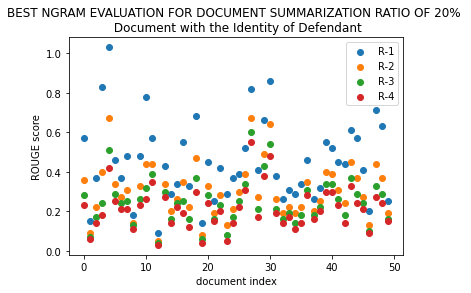

In [ ]:
import numpy as np
a =plt.scatter(np.arange(50),dfa['1 A'])
b =plt.scatter(np.arange(50),dfa['2 A'])
c =plt.scatter(np.arange(50),dfa['3 A'])
d =plt.scatter(np.arange(50),dfa['4 A'])
plt.legend((a,b,c,d),('R-1','R-2','R-3','R-4'))
plt.xlabel('document index')
plt.ylabel('ROUGE score')
plt.title('BEST NGRAM EVALUATION FOR DOCUMENT SUMMARIZATION RATIO OF 20% \n Document with the Identity of Defendant')
plt.show()

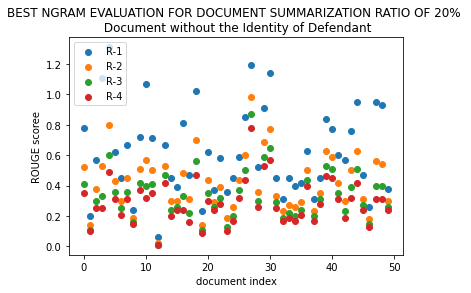

In [ ]:
a=plt.scatter(np.arange(50),dfb['1 B'])
b=plt.scatter(np.arange(50),dfb['2 B'])
c=plt.scatter(np.arange(50),dfb['3 B'])
d=plt.scatter(np.arange(50),dfb['4 B'])
plt.legend((a,b,c,d),('R-1','R-2','R-3','R-4'))
plt.xlabel('document index')
plt.ylabel('ROUGE scoree')
plt.title('BEST NGRAM EVALUATION FOR DOCUMENT SUMMARIZATION RATIO OF 20% \n Document without the Identity of Defendant')
plt.show()